<a href="https://colab.research.google.com/github/girotodenis/semisupervisionada/blob/master/RL_Deep_Learning_2019_1_NOME_INICIAL_DOS_INTEGRANTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO DOS INTEGRANTES DO GRUPO: Denis Silva Giroto

MATRÍCULAS DOS INTEGRANTES DO GRUPO:

**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**

# EXERCÍCIOS

## EXERCÍCIO 1

Refere-se aos exemplos de código apresentados em sala de aula.

### 1.1 



Com o passar as iterações / experiências do agente, as correções aplicadas à função de valor tendem a cair. Nos exemplos, essa variação era denotada por um delta. Dessa maneira, pode ser mais interessante eficiente impor uma restrição com um delta, que denota a convergência do algoritmo, ao invés de obedecer cegamente ao número de iterações específicados.

Faça uma versão do algoritmo de programação dinâmica e do de Monte Carlo que recebe um número desejado de iterações mas que tem como critério de convergência um delta, testado com relação a limiar de parada. Rode experimentos variando o limiar de delta e exiba os resultados da política greedy obtida.

In [0]:
# Células de código aqui

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

1 - Policy Evaluation

In [0]:
gamma = 1
reward_value = -1 # Exceto nos estados terminais
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]] # Estados terminais nas pontas do grid
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # Deslocamento das ações: baixo, cima, direita, esquerda
iterations = 1000

In [0]:
def actionRewardFunction(init_positions, action):
    
    # Caso esteja no estado terminal, a recompensa é 0
    if init_positions in terminal_states:
        return init_positions, 0
    
    reward = reward_value
    # Calcula a nova posição
    final_positions = np.array(init_positions) + np.array(action)
    # Se a nova posição tira o agente do grid, ele retorna ao estado anterior
    if -1 in final_positions or 4 in final_positions: 
        final_positions = init_positions
    
    return final_positions, reward

In [0]:
value_map = np.zeros((grid_size, grid_size))
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [75]:
deltas = []

for it in range(iterations):

    if(len(deltas)>0 and np.mean(deltas[-1])==0.0):
      print('numero interacao',it) 
      break

    copyvalue_map = np.copy(value_map)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            final_positions, reward = actionRewardFunction(state, action)
            # 1/len(actions) porque a política é uma distribuição uniforme
            weightedRewards += (1/len(actions)) * (reward + gamma * value_map[final_positions[0], final_positions[1]])
        # Pode ser utilizado para verificar o quanto há de mudança nos backups da policy iteration
       
        deltaState.append(np.abs(copyvalue_map[state[0], state[1]] - weightedRewards))
        copyvalue_map[state[0], state[1]] = weightedRewards
   
    deltas.append(deltaState)
    value_map = copyvalue_map



numero interacao 634


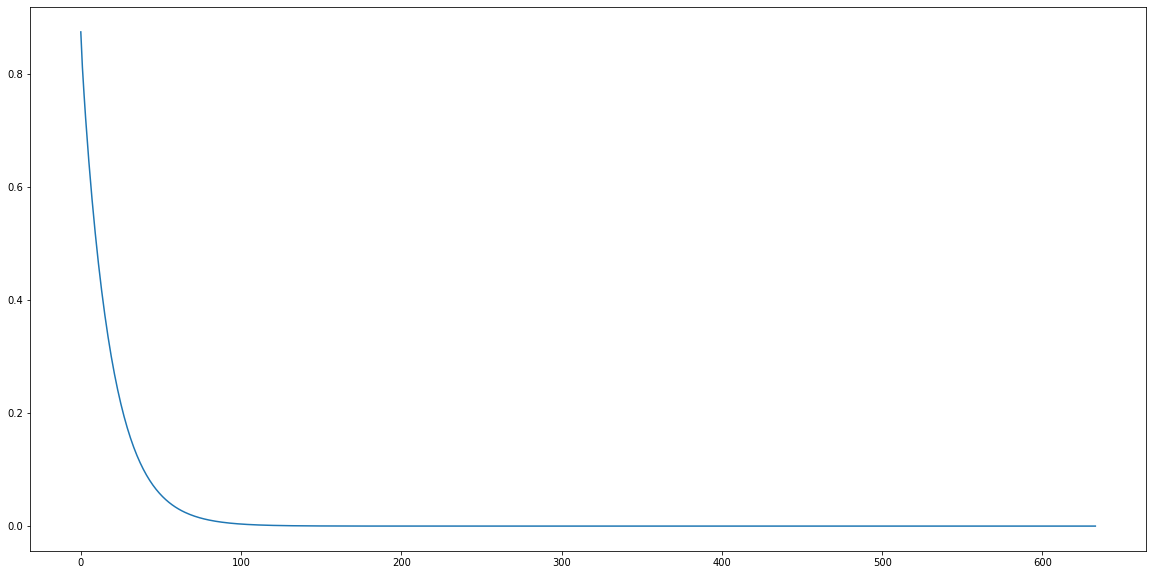

In [76]:
plt.figure(figsize=(20, 10))
mean_delta = np.mean(deltas, axis=1)
plt.plot(mean_delta)


Exemplo 2 - Monte Carlo

In [0]:
gamma = 0.6
reward_value = -1
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
iterations = 10000

In [0]:
V = np.zeros((grid_size, grid_size))
returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [0]:
def generateEpisode():
    init_state = random.choice(states[1:-1])
    episode = []
    while True:
        if list(init_state) in terminal_states:
            return episode
        action = random.choice(actions)
        final_state = np.array(init_state) + np.array(action)
        if -1 in list(final_state) or grid_size in list(final_state):
            final_state = init_state
        episode.append([list(init_state), action, reward_value, list(final_state)])
        init_state = final_state

In [87]:
for it in range(iterations):
    episode = generateEpisode()
    G = 0

    episode = episode[::-1]
    for i, (initial_position, action, reward, final_position) in enumerate(episode):
        G = gamma * G + reward # Usa a propriedade recursiva do horizonte descontado
        # First-visit MC: só considera o retorno obtido se o estado não foi visitado
        # Every-visit MC: considera todos os retornos obtidos em visitas a um único estado
        if initial_position not in [x[0] for x in episode[len(episode)-i:]]:
            idx = tuple(initial_position)
            # Returns vai guardar o horizonte para este estado naquele momento
            returns[idx].append(G)
            new_value = np.average(returns[idx])
            deltas[idx].append(np.abs(V[idx] - new_value))
            V[idx] = new_value


Iteration 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Iteration 1
[[ 0.  -1.  -1.6  0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]


Iteration 2
[[ 0.         -1.         -1.6         0.        ]
 [-2.49455804  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -2.17312    -1.676672    0.        ]]


Iteration 9
[[ 0.         -1.7399223  -2.18721166 -2.49673483]
 [-1.77346389 -2.05070795 -2.43448751 -2.2408    ]
 [-2.0968     -2.269744   -2.34518873 -1.52      ]
 [-2.28147712 -2.12373094 -1.86231931  0.        ]]


Iteration 99
[[ 0.         -1.62163983 -2.19290069 -2.41177133]
 [-1.56073398 -2.09556414 -2.24803525 -2.16340347]
 [-2.20996686 -2.21191418 -2.16150378 -1.55189823]
 [-2.39363454 -2.04251815 -1.50620904  0.        ]]


Iteration 9999
[[ 0.         -1.63956858 -2.21291798 -2.3734143 ]
 [-1.63256777 -2.09641562 -2.28140916 -2.21620692]
 [-2.20540915 -2.27980213 -2.10518791 -1.6

In [102]:
all_series = [list(x)[:50] for x in deltas.values()]

len(all_series[-2])


50

[]
[1.0, 0.7374028799999999, 0.24916019199999995, 0.246640768, 0.0440155391999999, 0.1306563072, 0.09332593371428577, 0.005005549714286017, 0.04389320533333341, 0.06088543573333327, 0.06887555258181832, 0.05140370618181822, 0.07173847137673839, 0.06154609272584444, 0.05337129269470342, 0.046728092206939964, 0.04698968923554281, 0.04176861265381571, 0.013154399204480693, 0.02263895928403259, 0.026654296495077112, 0.029886451359161015, 0.034886979193809564, 0.017020269072341332, 0.02084264754655396, 0.030976017649334775, 0.0064592756012358254, 0.006859244084566507, 0.026717255507472393, 0.02493610514030764, 0.003972485453836105, 0.0224742051129716, 0.021112132075821632, 0.01987024195371445, 0.01873479955635937, 0.017693977358783863, 0.00920839979574506, 0.014407957701232155, 0.016484758078318063, 0.008339479825597573, 0.02073471144386141, 0.015607023767751249, 0.0009276273134373181, 0.014521826071917321, 0.013876411579832215, 0.013273089337230815, 0.012312999570736727, 0.0127000420780445

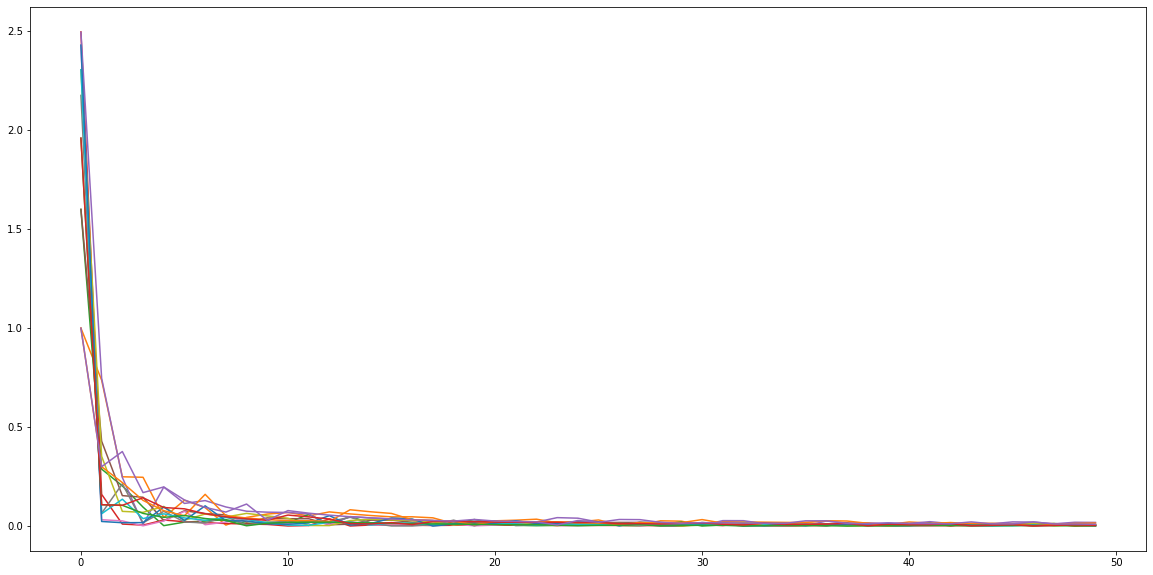

In [96]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    print(series)
    plt.plot(series)

### 1.2

Implemente no exemplo de TD(0) uma estratégia epsilon-greedy, ao invés de uma escolha aleatória de ações. Para decidir qual a ação greedy em um determinado momento, é necessário considerar a maior função de valor nas redondezas de um estado.

Faça experimentos variando o epsilon. Compare os resultados da política greedy após 10, 100, 500 e 1000 episódios, em cada um dos cenários. 

Compare esses resultados com os resultados de uma política greedy após 10, 100, 500 e 1000 episódios considerando o código original de exemplo.

Responda com base nos experimentos e plots apresentados: qual o impacto do fator de exploração do agente ao usar o TD(0)?

In [0]:
# Células de código aqui

## EXERCÍCIO 2

Diz respeito aos exemplos teóricos formulados em sala de aula.

### 2.1

Implemente o Sarsa para o exemplo do grid com o vento apresentado em sala de aula (ver exemplo e explicações detalhadas no livro referência). 

Lembrese: a diferença do Sars é que ao invés de usar a função valor-estado (função v), utiliza-se a função de estado-ação (função Q).

Implemente uma estratégia epsilon-greedy e escolha os hiperparâmetros de forma a haver convergência do agente. Faça o experimento com 50, 100 e 1000 e 10000 episódios. Observe a política greedy do agente após esse número de episódios.

Responda com base nos experimentos e plots: o agente consegue chegar de maneira interessante ao objetivo?

In [0]:
# Células de código aqui

### 2.2

Utilize o algoritmo de Q-learning para o cenário 2.1. Há diferença na política greedy após 50, 100, 1000 e 10000 episódios com relação aos resultados obtidos em 2.1?

In [0]:
# Células de código aqui

### 2.3

Considere o melhor resultado de 2.1 como baseline de comparação.

Implemente agora o Sars no cenário **Windy Gridworld with King's Moves**, conforme especificado no Exercício 6.9 do livro base.

Esse cenário é o mesmo windy gridworld mas, dessa vez, há oito possíveis ações: as usuais e as ações nas diagonais.

Compare os resultados no grid nas mesmas circunstâncias. Responda com base nos experimentos e plots: ter a disposição mais ações ajuda a acelerar a convergência do algoritmo?

In [0]:
# Células de código aqui

### 2.4

Considere o algoritmo de Q-learning. Dessa vez modele um cenário de **Stochastic Windy Gridworld** conforme apresentado no exerício 6.10 do livro base.

Nesse cenário, o vento, ao invés de ter um impacto definido deterministicamente, tem um comportamento estocástico: pode mover o agente 1 célula para cima, 2 células para cima ou 1 célula para baixo. Cada uma dessas situações tem uma probabilidade 1/3 de acontecer.

Por exemplo, se você está á direita do estado objetivo e escolhe a ação "esquerda", em 1/3 das vezes você terminará uma célula acima do objetivo, em 1/3 das vezes você terminará duas células acima do objetivo e em 1/3 das vezes você terminará 1 célula abaixo do objetivo.

In [0]:
# Células de código aqui

### 2.5

Implemente o cenário do "The Cliff", apresentado em sala de aula. Utilize tanto o Sars quanto o Q-learning. Faça comparações dos resultados com a política greedy do agente após 100, 1000 e 10000 episódios.

OBS.: utilize uma estratégia epsilon-greedy para a dinâmica do agente. Especifique hiperparâmetros de forma a conseguir convergência do algoritmo.

In [0]:
# Células de código aqui

# Exercício 3 <EM CONSTRUÇÃO>

Uso de modelos de aprendizado por reforço profundo.

# Exercício 4 <EM CONSTRUÇÃO>

Experimentos com autoencoders.